In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('binance-reviews')

In [ ]:
data

,userName,content
0,David Michalík,It has been very stable in the last few volati...
1,mega mind,This service is increasingly becoming a pain t...
2,Prince Gwebu,love how it allows me to make investments. als...
3,Moch Rifai,The New button in Perpetual is quite confusing...
4,Perfect Roland,App keeps logging out and never allows me do a...
...,...,...
49995,Christina Marciano,May i have your customer service support email...
49996,Rupam Baishya,World best exchange
49997,uche Okenyi,This app is nonsense now.
49998,Lijune Leyno,Worth trusted wallet!!!


# Preparing text data

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Contractions
data['no_contractions'] = data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [ ]:
data['content_no_contractions'] = [" ".join(l) for l in data['no_contractions']]

In [ ]:
# Tokenize
data['content_tokenized'] = data['content_no_contractions'].apply(word_tokenize)

In [ ]:
# Lowercase
data['content_lower'] = data['content_tokenized'].apply(lambda x: [word.lower() for word in x])

In [ ]:
# Punctuation
punctuations = string.punctuation
data['content_no_punctuation'] = data['content_lower'].apply(lambda x: [word for word in x if word not in punctuations])

In [ ]:
# Cleaned content
data['content_cleaned'] = [" ".join(l) for l in data['content_no_punctuation']]

In [ ]:
data

,userName,content,no_contractions,content_no_contractions,content_tokenized,content_lower,content_no_punctuation,content_cleaned
0,David Michalík,It has been very stable in the last few volati...,"[It, has, been, very, stable, in, the, last, f...",It has been very stable in the last few volati...,"[It, has, been, very, stable, in, the, last, f...","[it, has, been, very, stable, in, the, last, f...","[it, has, been, very, stable, in, the, last, f...",it has been very stable in the last few volati...
1,mega mind,This service is increasingly becoming a pain t...,"[This, service, is, increasingly, becoming, a,...",This service is increasingly becoming a pain t...,"[This, service, is, increasingly, becoming, a,...","[this, service, is, increasingly, becoming, a,...","[this, service, is, increasingly, becoming, a,...",this service is increasingly becoming a pain t...
2,Prince Gwebu,love how it allows me to make investments. als...,"[love, how, it, allows, me, to, make, investme...",love how it allows me to make investments. als...,"[love, how, it, allows, me, to, make, investme...","[love, how, it, allows, me, to, make, investme...","[love, how, it, allows, me, to, make, investme...",love how it allows me to make investments also...
3,Moch Rifai,The New button in Perpetual is quite confusing...,"[The, New, button, in, Perpetual, is, quite, c...",The New button in Perpetual is quite confusing...,"[The, New, button, in, Perpetual, is, quite, c...","[the, new, button, in, perpetual, is, quite, c...","[the, new, button, in, perpetual, is, quite, c...",the new button in perpetual is quite confusing...
4,Perfect Roland,App keeps logging out and never allows me do a...,"[App, keeps, logging, out, and, never, allows,...",App keeps logging out and never allows me do a...,"[App, keeps, logging, out, and, never, allows,...","[app, keeps, logging, out, and, never, allows,...","[app, keeps, logging, out, and, never, allows,...",app keeps logging out and never allows me do a...
...,...,...,...,...,...,...,...,...
49995,Christina Marciano,May i have your customer service support email...,"[May, i, have, your, customer, service, suppor...",May i have your customer service support email...,"[May, i, have, your, customer, service, suppor...","[may, i, have, your, customer, service, suppor...","[may, i, have, your, customer, service, suppor...",may i have your customer service support email...
49996,Rupam Baishya,World best exchange,"[World, best, exchange]",World best exchange,"[World, best, exchange]","[world, best, exchange]","[world, best, exchange]",world best exchange
49997,uche Okenyi,This app is nonsense now.,"[This, app, is, nonsense, now.]",This app is nonsense now.,"[This, app, is, nonsense, now, .]","[this, app, is, nonsense, now, .]","[this, app, is, nonsense, now]",this app is nonsense now
49998,Lijune Leyno,Worth trusted wallet!!!,"[Worth, trusted, wallet!!!]",Worth trusted wallet!!!,"[Worth, trusted, wallet, !, !, !]","[worth, trusted, wallet, !, !, !]","[worth, trusted, wallet]",worth trusted wallet


# Dealing with stop words

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_cleaned = data[['content', 'content_cleaned']]

Membuat variable baru yang berisi kolom dari dataframe "data"

In [ ]:
data_cleaned.head(10)

,content,content_cleaned
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...
2,love how it allows me to make investments. als...,love how it allows me to make investments also...
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...
5,When this app initially was released you can e...,when this app initially was released you can e...
6,The Binance app's recent interface issue is ca...,the binance app 's recent interface issue is c...
7,Pfft. This is the online exchange app that kee...,pfft this is the online exchange app that keep...
8,The app has been frustrating in terms of the i...,the app has been frustrating in terms of the i...
9,"After the update, I always have this problem o...",after the update i always have this problem of...


In [ ]:
# Tokenize cleaned content
data_cleaned['content_tokenized'] = data['content_cleaned'].apply(word_tokenize)

<ipython-input-19-a69cedfc1588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['content_tokenized'] = data['content_cleaned'].apply(word_tokenize)


In [ ]:

data_cleaned.head(10)

,content,content_cleaned,content_tokenized
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,"[it, has, been, very, stable, in, the, last, f..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,"[this, service, is, increasingly, becoming, a,..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,"[love, how, it, allows, me, to, make, investme..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,"[the, new, button, in, perpetual, is, quite, c..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,"[app, keeps, logging, out, and, never, allows,..."
5,When this app initially was released you can e...,when this app initially was released you can e...,"[when, this, app, initially, was, released, yo..."
6,The Binance app's recent interface issue is ca...,the binance app 's recent interface issue is c...,"[the, binance, app, 's, recent, interface, iss..."
7,Pfft. This is the online exchange app that kee...,pfft this is the online exchange app that keep...,"[pfft, this, is, the, online, exchange, app, t..."
8,The app has been frustrating in terms of the i...,the app has been frustrating in terms of the i...,"[the, app, has, been, frustrating, in, terms, ..."
9,"After the update, I always have this problem o...",after the update i always have this problem of...,"[after, the, update, i, always, have, this, pr..."


In [ ]:
# Collecting all words
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
content_words = combine_words(data_cleaned['content_tokenized'])
content_words [:10]

['it', 'has', 'been', 'very', 'stable', 'in', 'the', 'last', 'few', 'volatile']

In [ ]:
# Count frequency of each words
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [ ]:
content_topwords_count = count_topwords(content_words)
content_topwords_count.head()

,words,word_count
15,i,29786
21,to,27138
6,the,26319
11,app,23449
37,is,23001


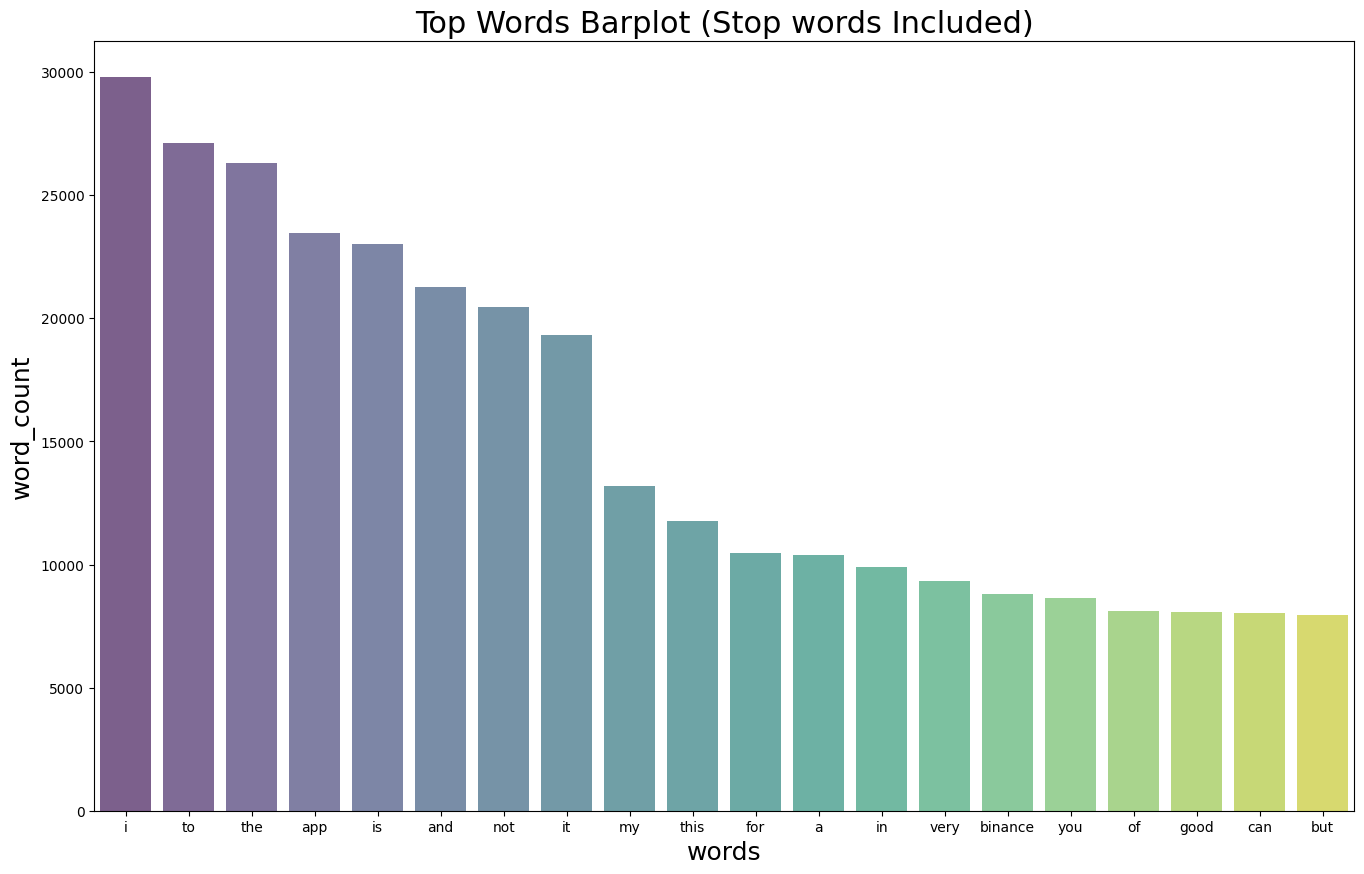

In [ ]:
# Barplot of the top words (Stop words Included)
plt.figure(figsize= (18,10))
sns.barplot (content_topwords_count, x=content_topwords_count['words'], y=content_topwords_count ['word_count'],
             palette='viridis', linewidth=0, alpha=0.7)

plt.xlabel('words', fontsize=18)
plt.ylabel('word_count', fontsize=18)
plt.title('Top Words Barplot (Stop words Included)', fontsize=22)
plt.subplots_adjust(left=0.2)
plt.show()

In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data_cleaned['no_stopwords'] = data_cleaned['content_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

<ipython-input-26-1187e44d5b0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['no_stopwords'] = data_cleaned['content_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


In [ ]:
data_cleaned.head(5)

,content,content_cleaned,content_tokenized,no_stopwords
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,"[it, has, been, very, stable, in, the, last, f...","[stable, last, volatile, years, app, wise, exc..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,"[this, service, is, increasingly, becoming, a,...","[service, increasingly, becoming, pain, deal, ..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,"[love, how, it, allows, me, to, make, investme...","[love, allows, make, investments, also, gives,..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,"[the, new, button, in, perpetual, is, quite, c...","[new, button, perpetual, quite, confusing, any..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,"[app, keeps, logging, out, and, never, allows,...","[app, keeps, logging, never, allows, anything,..."


In [ ]:
content_words = combine_words(data_cleaned['no_stopwords'])
content_words [:10]

['stable',
 'last',
 'volatile',
 'years',
 'app',
 'wise',
 'exchange',
 'wise',
 'always',
 'could']

In [ ]:
content_no_stopwords = combine_words(data_cleaned['no_stopwords'])
content_words_count = count_topwords(content_no_stopwords)
content_words_count.head()

,words,word_count
4,app,23449
181,binance,8817
92,good,8062
892,best,5961
79,crypto,4691


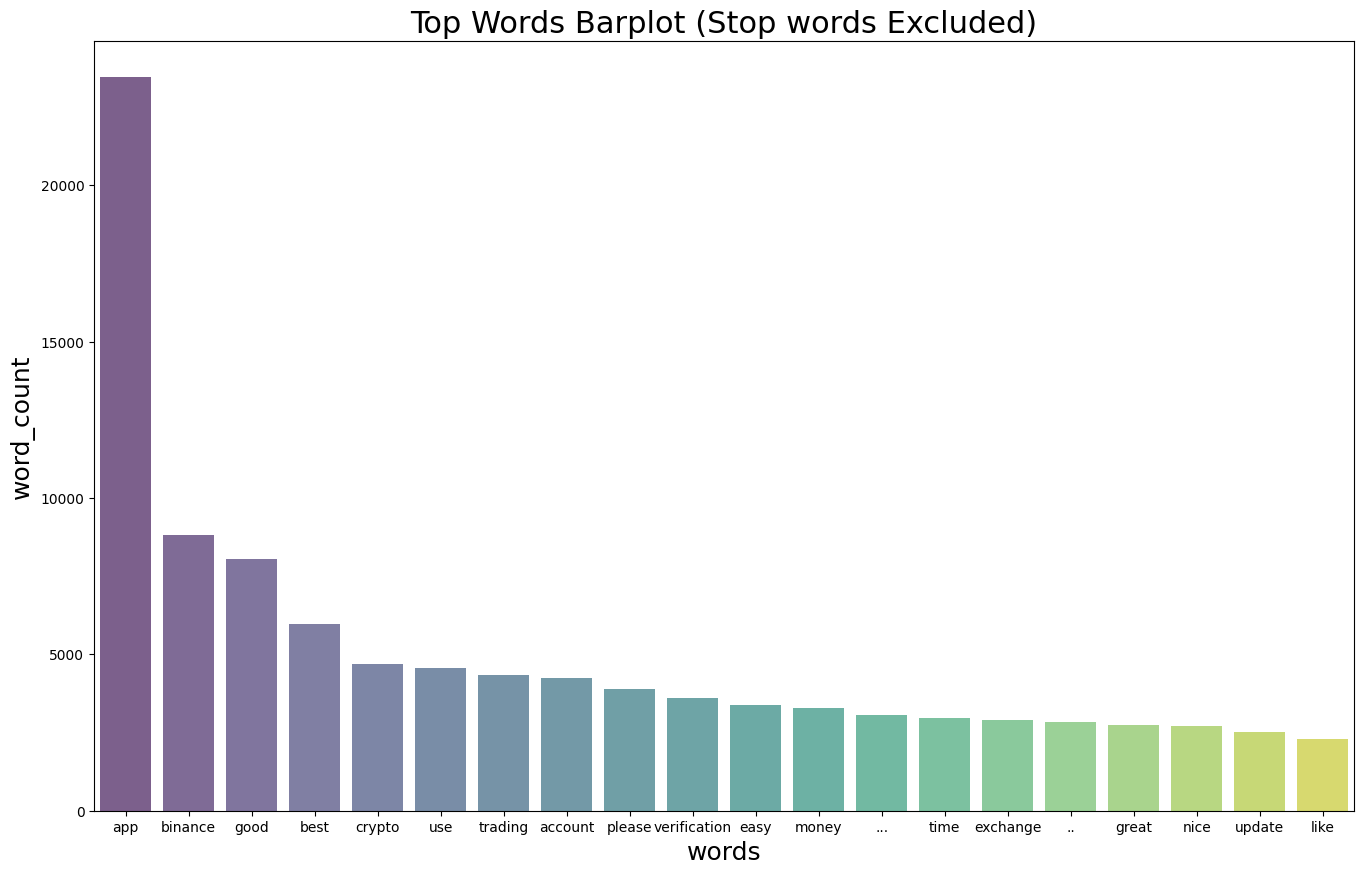

In [ ]:
# Barplot of the top words (Stop words Included)
plt.figure(figsize= (18,10))
sns.barplot (content_words_count, x=content_words_count['words'], y=content_words_count ['word_count'],
             palette='viridis', linewidth=0, alpha=0.7)

plt.xlabel('words', fontsize=18)
plt.ylabel('word_count', fontsize=18)
plt.title('Top Words Barplot (Stop words Excluded)', fontsize=22)
plt.subplots_adjust(left=0.2)
plt.show()

In [ ]:
data_cleaned['content_no_stopwords'] = [" ".join(l) for l in data_cleaned['no_stopwords']]

<ipython-input-31-5c2a5e2b4a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['content_no_stopwords'] = [" ".join(l) for l in data_cleaned['no_stopwords']]


In [ ]:
data_cleaned

,content,content_cleaned,content_tokenized,no_stopwords,content_no_stopwords
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,"[it, has, been, very, stable, in, the, last, f...","[stable, last, volatile, years, app, wise, exc...",stable last volatile years app wise exchange w...
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,"[this, service, is, increasingly, becoming, a,...","[service, increasingly, becoming, pain, deal, ...",service increasingly becoming pain deal last t...
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,"[love, how, it, allows, me, to, make, investme...","[love, allows, make, investments, also, gives,...",love allows make investments also gives free c...
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,"[the, new, button, in, perpetual, is, quite, c...","[new, button, perpetual, quite, confusing, any...",new button perpetual quite confusing anyone fa...
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,"[app, keeps, logging, out, and, never, allows,...","[app, keeps, logging, never, allows, anything,...",app keeps logging never allows anything withdr...
...,...,...,...,...,...
49995,May i have your customer service support email...,may i have your customer service support email...,"[may, i, have, your, customer, service, suppor...","[may, customer, service, support, email, addre...",may customer service support email address thank
49996,World best exchange,world best exchange,"[world, best, exchange]","[world, best, exchange]",world best exchange
49997,This app is nonsense now.,this app is nonsense now,"[this, app, is, nonsense, now]","[app, nonsense]",app nonsense
49998,Worth trusted wallet!!!,worth trusted wallet,"[worth, trusted, wallet]","[worth, trusted, wallet]",worth trusted wallet


# Analyzing part of speech

In [ ]:
from nltk import pos_tag

In [ ]:
data = data_cleaned[['content','content_cleaned','content_no_stopwords']]

In [ ]:
# Tokenized no stopword
data['content_tokenized'] = data['content_no_stopwords'].apply(word_tokenize)

<ipython-input-35-f533514cf9c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content_tokenized'] = data['content_no_stopwords'].apply(word_tokenize)


In [ ]:
# Create part of speech tags
data['content_pos_tags'] = data['content_tokenized'].apply(nltk.tag.pos_tag)

In [ ]:
data.head(10)

,content,content_cleaned,content_no_stopwords,content_tokenized,content_pos_tags
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[(stable, JJ), (last, JJ), (volatile, JJ), (ye..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[(service, NN), (increasingly, RB), (becoming,..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[(love, NN), (allows, NNS), (make, VBP), (inve..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[(new, JJ), (button, NN), (perpetual, JJ), (qu..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[(app, JJ), (keeps, NNS), (logging, VBG), (nev..."
5,When this app initially was released you can e...,when this app initially was released you can e...,app initially released easily buy coins even k...,"[app, initially, released, easily, buy, coins,...","[(app, NN), (initially, RB), (released, VBN), ..."
6,The Binance app's recent interface issue is ca...,the binance app 's recent interface issue is c...,binance app 's recent interface issue causing ...,"[binance, app, 's, recent, interface, issue, c...","[(binance, NN), (app, NN), ('s, POS), (recent,..."
7,Pfft. This is the online exchange app that kee...,pfft this is the online exchange app that keep...,pfft online exchange app keeps loading connect...,"[pfft, online, exchange, app, keeps, loading, ...","[(pfft, NNS), (online, VBP), (exchange, NN), (..."
8,The app has been frustrating in terms of the i...,the app has been frustrating in terms of the i...,app frustrating terms information loading time...,"[app, frustrating, terms, information, loading...","[(app, JJ), (frustrating, NN), (terms, NNS), (..."
9,"After the update, I always have this problem o...",after the update i always have this problem of...,update always problem server issues close trad...,"[update, always, problem, server, issues, clos...","[(update, JJ), (always, RB), (problem, NN), (s..."


In [ ]:
# Extract adjectives
data['content_adjectives'] = data['content_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

In [ ]:
data.head(10)

,content,content_cleaned,content_no_stopwords,content_tokenized,content_pos_tags,content_adjectives
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[(stable, JJ), (last, JJ), (volatile, JJ), (ye...","[stable, last, volatile, wise, external, sligh..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[(service, NN), (increasingly, RB), (becoming,...","[last, release, complete, add, google, optiona..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[(love, NN), (allows, NNS), (make, VBP), (inve...","[free, good]"
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[(new, JJ), (button, NN), (perpetual, JJ), (qu...","[new, perpetual, familiar, old, wrong, insted,..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[(app, JJ), (keeps, NNS), (logging, VBG), (nev...","[app, withdrawal, app, impossible, mobile]"
5,When this app initially was released you can e...,when this app initially was released you can e...,app initially released easily buy coins even k...,"[app, initially, released, easily, buy, coins,...","[(app, NN), (initially, RB), (released, VBN), ...","[whole, excellent, worth]"
6,The Binance app's recent interface issue is ca...,the binance app 's recent interface issue is c...,binance app 's recent interface issue causing ...,"[binance, app, 's, recent, interface, issue, c...","[(binance, NN), (app, NN), ('s, POS), (recent,...","[recent, bit, inconvenience, white, white, dif..."
7,Pfft. This is the online exchange app that kee...,pfft this is the online exchange app that keep...,pfft online exchange app keeps loading connect...,"[pfft, online, exchange, app, keeps, loading, ...","[(pfft, NNS), (online, VBP), (exchange, NN), (...","[app, connect, close, inconvenient]"
8,The app has been frustrating in terms of the i...,the app has been frustrating in terms of the i...,app frustrating terms information loading time...,"[app, frustrating, terms, information, loading...","[(app, JJ), (frustrating, NN), (terms, NNS), (...","[app, next, open, heavy, updated, risky]"
9,"After the update, I always have this problem o...",after the update i always have this problem of...,update always problem server issues close trad...,"[update, always, problem, server, issues, clos...","[(update, JJ), (always, RB), (problem, NN), (s...","[update, everytime, delete, update, app, fine,..."


In [ ]:
# Combine all adjective words and sort them based on frequency
content_adjectives = combine_words(data['content_adjectives'])
adjectives_word_count = count_topwords(content_adjectives)

In [ ]:
content_adjectives [:10]

['stable',
 'last',
 'volatile',
 'wise',
 'external',
 'slight',
 'irrational',
 'free',
 'overall',
 'great']

In [ ]:
adjectives_word_count.head()

,words,word_count
22,good,7945
13,app,3401
68,easy,3092
9,great,2749
200,nice,2473


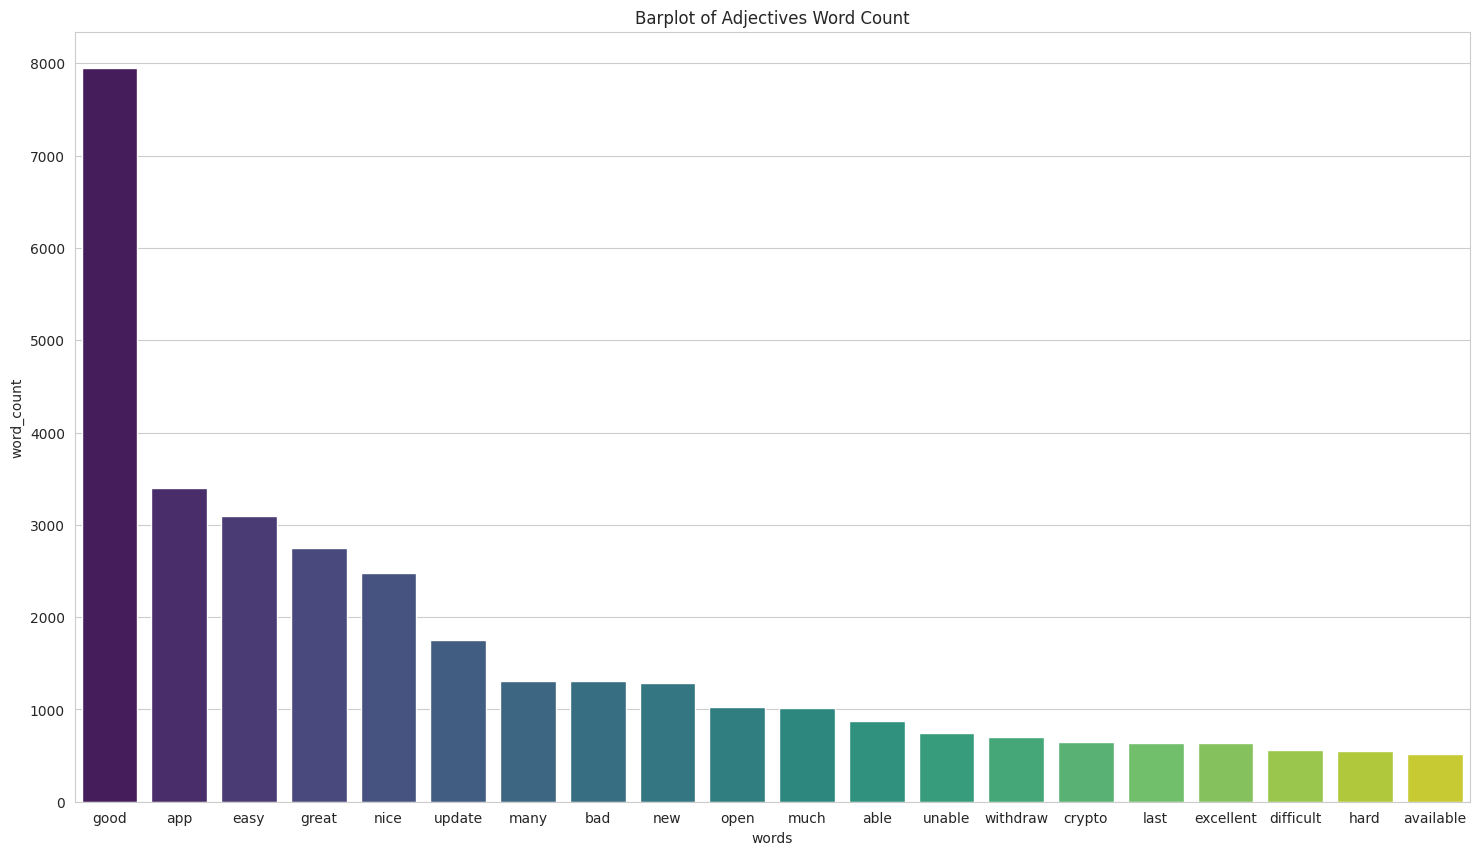

In [ ]:
# Setting the size of the plot
plt.figure(figsize= (18,10))

# Customizing the appearance of the barplot
sns.set_style("whitegrid") # Background style
plt.title("Barplot of Adjectives Word Count") # Adding a title

# Barplot of adjectives word count
sns.barplot(x=adjectives_word_count['words'], y=adjectives_word_count['word_count'], palette='viridis')

# Displaying the plot
plt.show()

# Performing stemming and lemmatization

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
data = data_cleaned[['content','content_cleaned','content_no_stopwords']]

In [ ]:
# Tokenized no stopword
data['content_tokenized'] = data['content_no_stopwords'].apply(word_tokenize)

<ipython-input-46-f533514cf9c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content_tokenized'] = data['content_no_stopwords'].apply(word_tokenize)


In [ ]:
# Stemming Data
stemmer = nltk.PorterStemmer()
data['content_stemmed_data'] = data['content_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
data.head()

,content,content_cleaned,content_no_stopwords,content_tokenized,content_stemmed_data
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[stabl, last, volatil, year, app, wise, exchan..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[servic, increasingli, becom, pain, deal, last..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[love, allow, make, invest, also, give, free, ..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[new, button, perpetu, quit, confus, anyon, fa..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[app, keep, log, never, allow, anyth, withdraw..."


In [ ]:
# Perform part of speech tagging on the reviews data in preparation for lemmatization
data['content_pos_tags'] = data['content_tokenized'].apply(nltk.tag.pos_tag)

In [ ]:
# Custom function that converts pos_tag tags to the wordnet format to aid lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
data['content_wordnet_pos_tags'] = data['content_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [ ]:
data.head()

,content,content_cleaned,content_no_stopwords,content_tokenized,content_stemmed_data,content_pos_tags,content_wordnet_pos_tags
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[stabl, last, volatil, year, app, wise, exchan...","[(stable, JJ), (last, JJ), (volatile, JJ), (ye...","[(stable, a), (last, a), (volatile, a), (years..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[servic, increasingli, becom, pain, deal, last...","[(service, NN), (increasingly, RB), (becoming,...","[(service, n), (increasingly, r), (becoming, v..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[love, allow, make, invest, also, give, free, ...","[(love, NN), (allows, NNS), (make, VBP), (inve...","[(love, n), (allows, n), (make, v), (investmen..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[new, button, perpetu, quit, confus, anyon, fa...","[(new, JJ), (button, NN), (perpetual, JJ), (qu...","[(new, a), (button, n), (perpetual, a), (quite..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[app, keep, log, never, allow, anyth, withdraw...","[(app, JJ), (keeps, NNS), (logging, VBG), (nev...","[(app, a), (keeps, n), (logging, v), (never, r..."


In [ ]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()
data['content_lemmatized'] = data['content_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word,tag) for word, tag in x])
data.head()

,content,content_cleaned,content_no_stopwords,content_tokenized,content_stemmed_data,content_pos_tags,content_wordnet_pos_tags,content_lemmatized
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[stabl, last, volatil, year, app, wise, exchan...","[(stable, JJ), (last, JJ), (volatile, JJ), (ye...","[(stable, a), (last, a), (volatile, a), (years...","[stable, last, volatile, year, app, wise, exch..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[servic, increasingli, becom, pain, deal, last...","[(service, NN), (increasingly, RB), (becoming,...","[(service, n), (increasingly, r), (becoming, v...","[service, increasingly, become, pain, deal, la..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[love, allow, make, invest, also, give, free, ...","[(love, NN), (allows, NNS), (make, VBP), (inve...","[(love, n), (allows, n), (make, v), (investmen...","[love, allows, make, investment, also, give, f..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[new, button, perpetu, quit, confus, anyon, fa...","[(new, JJ), (button, NN), (perpetual, JJ), (qu...","[(new, a), (button, n), (perpetual, a), (quite...","[new, button, perpetual, quite, confuse, anyon..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[app, keep, log, never, allow, anyth, withdraw...","[(app, JJ), (keeps, NNS), (logging, VBG), (nev...","[(app, a), (keeps, n), (logging, v), (never, r...","[app, keep, log, never, allow, anything, withd..."


In [ ]:
data['content_cleaned_lemmatized'] = [' '.join(l) for l in data['content_lemmatized']]
data.head()

,content,content_cleaned,content_no_stopwords,content_tokenized,content_stemmed_data,content_pos_tags,content_wordnet_pos_tags,content_lemmatized,content_cleaned_lemmatized
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[stabl, last, volatil, year, app, wise, exchan...","[(stable, JJ), (last, JJ), (volatile, JJ), (ye...","[(stable, a), (last, a), (volatile, a), (years...","[stable, last, volatile, year, app, wise, exch...",stable last volatile year app wise exchange wi...
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[servic, increasingli, becom, pain, deal, last...","[(service, NN), (increasingly, RB), (becoming,...","[(service, n), (increasingly, r), (becoming, v...","[service, increasingly, become, pain, deal, la...",service increasingly become pain deal last tim...
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[love, allow, make, invest, also, give, free, ...","[(love, NN), (allows, NNS), (make, VBP), (inve...","[(love, n), (allows, n), (make, v), (investmen...","[love, allows, make, investment, also, give, f...",love allows make investment also give free cry...
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[new, button, perpetu, quit, confus, anyon, fa...","[(new, JJ), (button, NN), (perpetual, JJ), (qu...","[(new, a), (button, n), (perpetual, a), (quite...","[new, button, perpetual, quite, confuse, anyon...",new button perpetual quite confuse anyone fami...
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[app, keep, log, never, allow, anyth, withdraw...","[(app, JJ), (keeps, NNS), (logging, VBG), (nev...","[(app, a), (keeps, n), (logging, v), (never, r...","[app, keep, log, never, allow, anything, withd...",app keep log never allow anything withdrawal v...


In [ ]:
# Combine all lemmatized words and sort them based on frequency
content_lemmatized = combine_words(data['content_lemmatized'])
lemmatized_word_count = count_topwords(content_lemmatized)

In [ ]:
content_lemmatized [:10]

['stable',
 'last',
 'volatile',
 'year',
 'app',
 'wise',
 'exchange',
 'wise',
 'always',
 'could']

In [ ]:
lemmatized_word_count.head()

,words,word_count
4,app,23449
171,binance,8817
85,good,8325
119,use,6846
758,best,5970


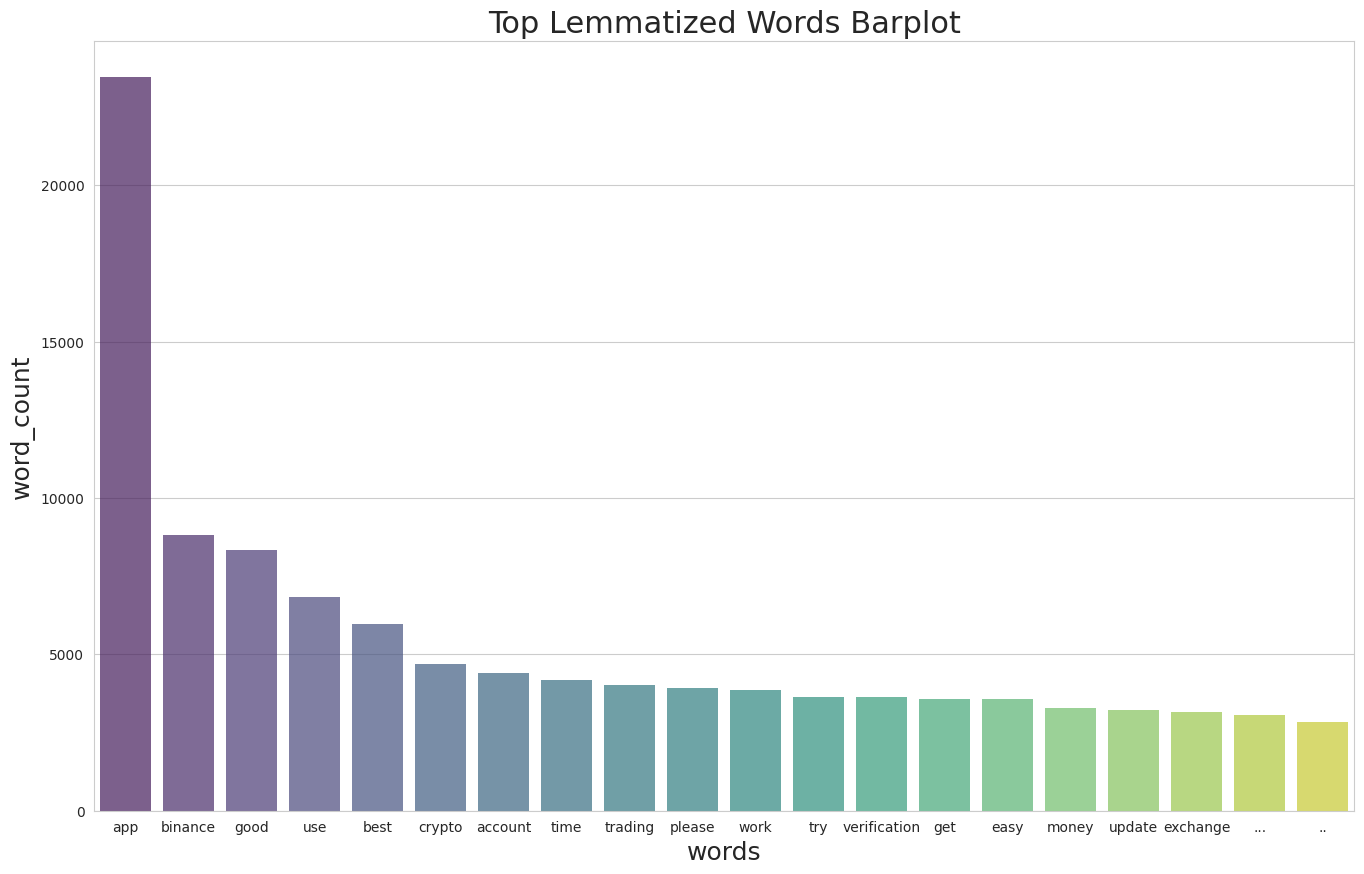

In [ ]:
# Barplot of lemmatized word
plt.figure(figsize= (18,10))
sns.barplot (lemmatized_word_count, x=lemmatized_word_count['words'], y=lemmatized_word_count['word_count'],
             palette='viridis', linewidth=0, alpha=0.7)

plt.xlabel('words', fontsize=18)
plt.ylabel('word_count', fontsize=18)
plt.title('Top Lemmatized Words Barplot', fontsize=22)
plt.subplots_adjust(left=0.2)
plt.show()

# Analyzing Ngrams

In [ ]:
from nltk import ngrams

In [ ]:
data = data[['content','content_cleaned', 'content_cleaned_lemmatized', 'content_no_stopwords']]

In [ ]:
# Tokenized no stopword
data['content_tokenized'] = data['content_no_stopwords'].apply(word_tokenize)

In [ ]:
# Function that extracts n-grams from text data
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

In [ ]:
data['content_ngrams'] = data['content_tokenized'].apply(lambda x: extract_ngrams(x, 2))
data.head()

,content,content_cleaned,content_cleaned_lemmatized,content_no_stopwords,content_tokenized,content_ngrams
0,It has been very stable in the last few volati...,it has been very stable in the last few volati...,stable last volatile year app wise exchange wi...,stable last volatile years app wise exchange w...,"[stable, last, volatile, years, app, wise, exc...","[stable last, last volatile, volatile years, y..."
1,This service is increasingly becoming a pain t...,this service is increasingly becoming a pain t...,service increasingly become pain deal last tim...,service increasingly becoming pain deal last t...,"[service, increasingly, becoming, pain, deal, ...","[service increasingly, increasingly becoming, ..."
2,love how it allows me to make investments. als...,love how it allows me to make investments also...,love allows make investment also give free cry...,love allows make investments also gives free c...,"[love, allows, make, investments, also, gives,...","[love allows, allows make, make investments, i..."
3,The New button in Perpetual is quite confusing...,the new button in perpetual is quite confusing...,new button perpetual quite confuse anyone fami...,new button perpetual quite confusing anyone fa...,"[new, button, perpetual, quite, confusing, any...","[new button, button perpetual, perpetual quite..."
4,App keeps logging out and never allows me do a...,app keeps logging out and never allows me do a...,app keep log never allow anything withdrawal v...,app keeps logging never allows anything withdr...,"[app, keeps, logging, never, allows, anything,...","[app keeps, keeps logging, logging never, neve..."


In [ ]:
# Combine all ngrams words and sort them based on frequency
content_ngrams = combine_words(data['content_ngrams'])
ngrams_word_count = count_topwords(content_ngrams)

In [ ]:
content_ngrams[:10]

['stable last',
 'last volatile',
 'volatile years',
 'years app',
 'app wise',
 'wise exchange',
 'exchange wise',
 'wise always',
 'always could',
 'could withdraw']

In [ ]:
ngrams_word_count.head()

,words,word_count
2447,good app,2122
2266,easy use,1626
1812,best app,1132
1486,nice app,1018
1949,great app,963


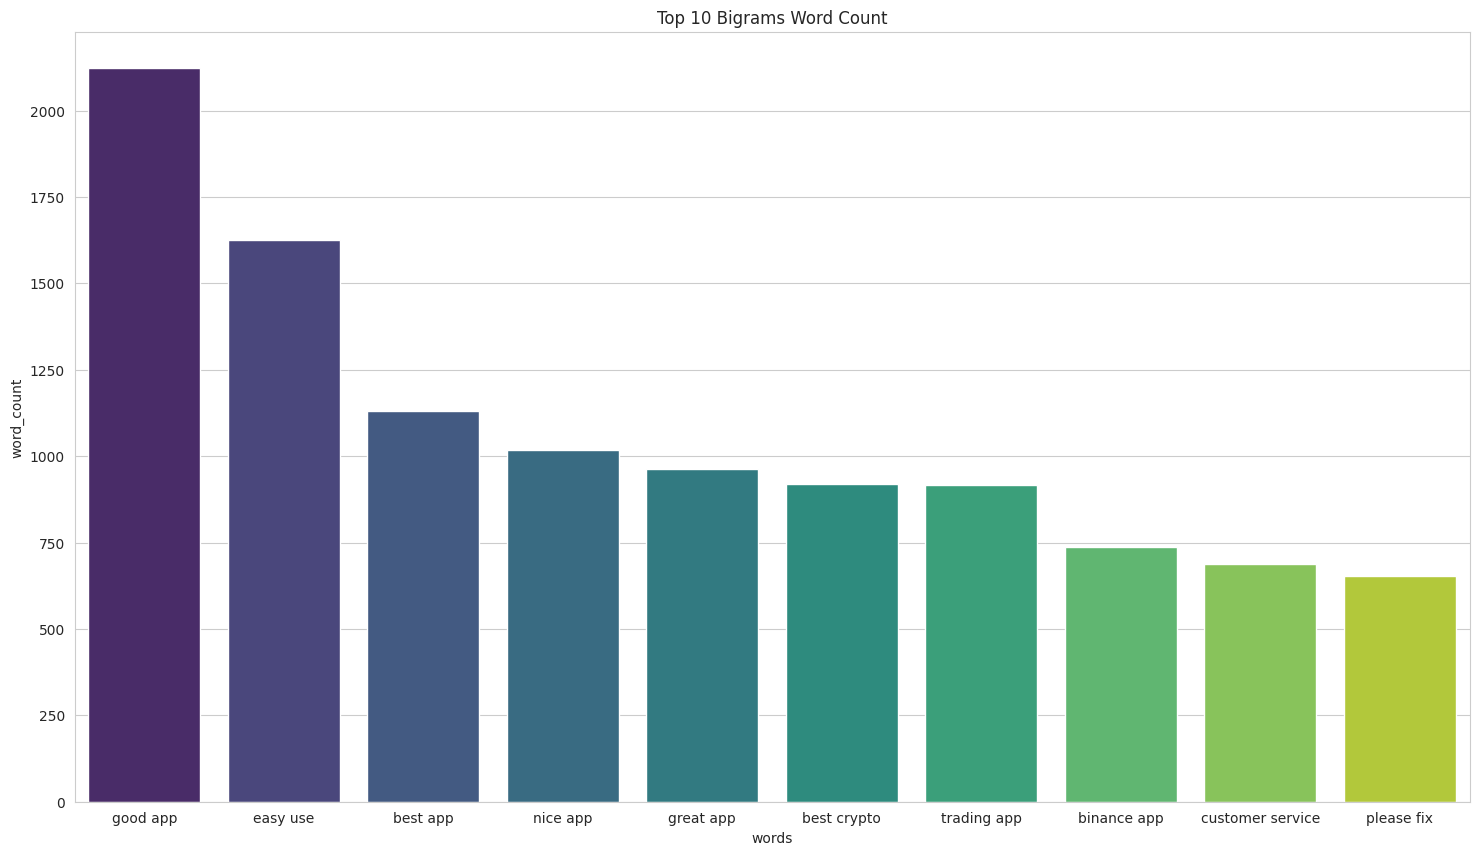

In [ ]:
top_ngrams_word_count = ngrams_word_count.nlargest(10, 'word_count')

# Barplot to show top 10 Bigrams Word Count
plt.figure(figsize=(18,10))
sns.barplot(data=top_ngrams_word_count, x='words', y='word_count', palette='viridis')
plt.xlabel('words')
plt.ylabel('word_count')
plt.title('Top 10 Bigrams Word Count')
plt.show()

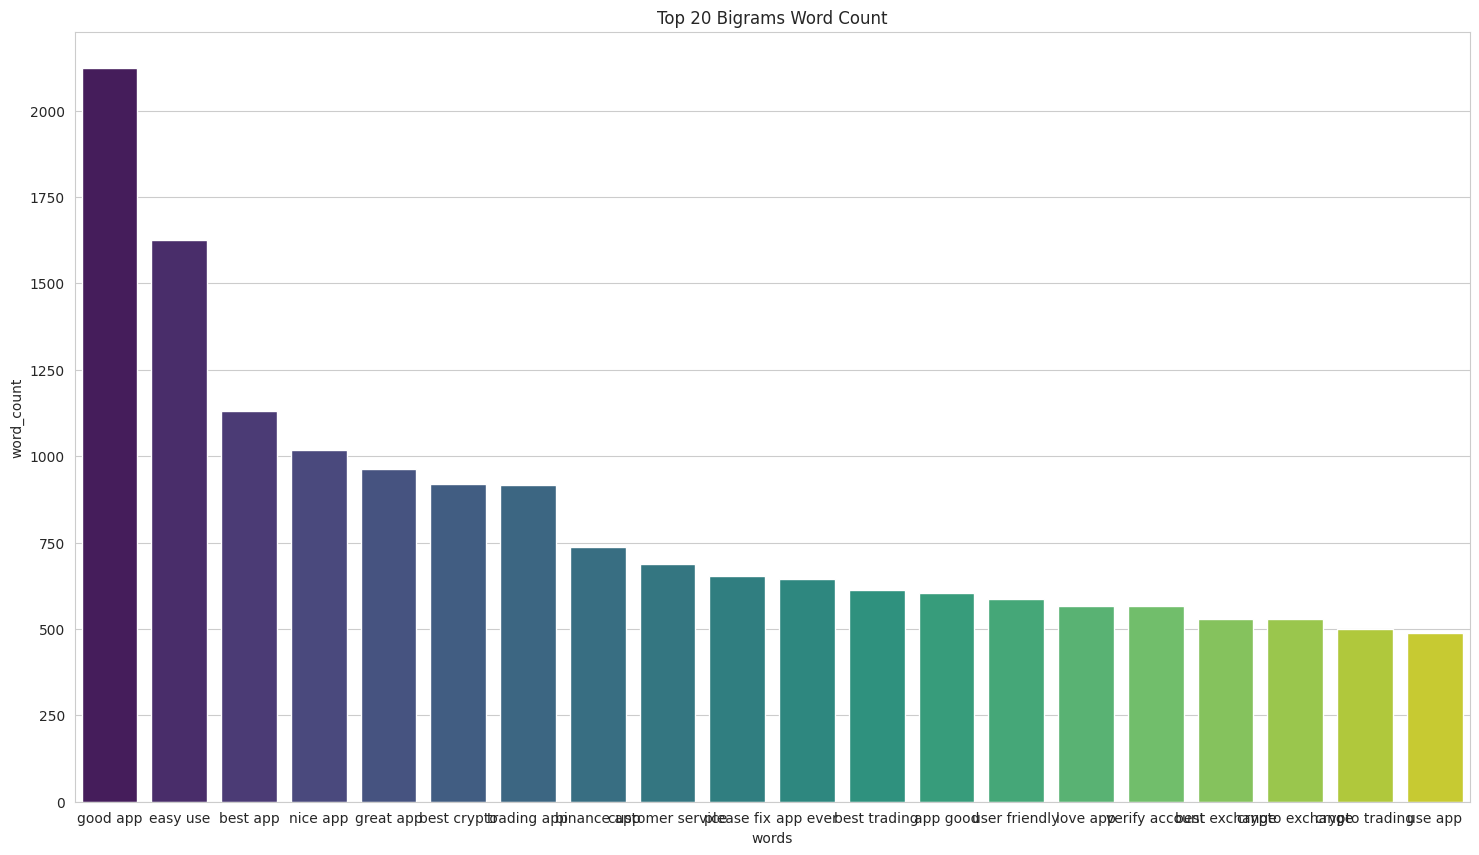

In [ ]:
top_ngrams_word_count = ngrams_word_count.nlargest(20, 'word_count')

# Barplot to show top 10 Bigrams Word Count
plt.figure(figsize=(18,10))
sns.barplot(data=top_ngrams_word_count, x='words', y='word_count', palette='viridis')
plt.xlabel('words')
plt.ylabel('word_count')
plt.title('Top 20 Bigrams Word Count')
plt.show()

# Creating word clouds

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [ ]:
data = data[['content', 'content_cleaned_lemmatized','content_cleaned']]

In [ ]:
# Tokenized cleaned lemmatized
data['content_tokenized'] = data['content_cleaned_lemmatized'].apply(word_tokenize)
data.head()

,content,content_cleaned_lemmatized,content_cleaned,content_tokenized
0,It has been very stable in the last few volati...,stable last volatile year app wise exchange wi...,it has been very stable in the last few volati...,"[stable, last, volatile, year, app, wise, exch..."
1,This service is increasingly becoming a pain t...,service increasingly become pain deal last tim...,this service is increasingly becoming a pain t...,"[service, increasingly, become, pain, deal, la..."
2,love how it allows me to make investments. als...,love allows make investment also give free cry...,love how it allows me to make investments also...,"[love, allows, make, investment, also, give, f..."
3,The New button in Perpetual is quite confusing...,new button perpetual quite confuse anyone fami...,the new button in perpetual is quite confusing...,"[new, button, perpetual, quite, confuse, anyon..."
4,App keeps logging out and never allows me do a...,app keep log never allow anything withdrawal v...,app keeps logging out and never allows me do a...,"[app, keep, log, never, allow, anything, withd..."


In [ ]:
# Combine all tokenized words
content_words = combine_words(data['content_tokenized'])

In [ ]:
content_words [:10]

['stable',
 'last',
 'volatile',
 'year',
 'app',
 'wise',
 'exchange',
 'wise',
 'always',
 'could']

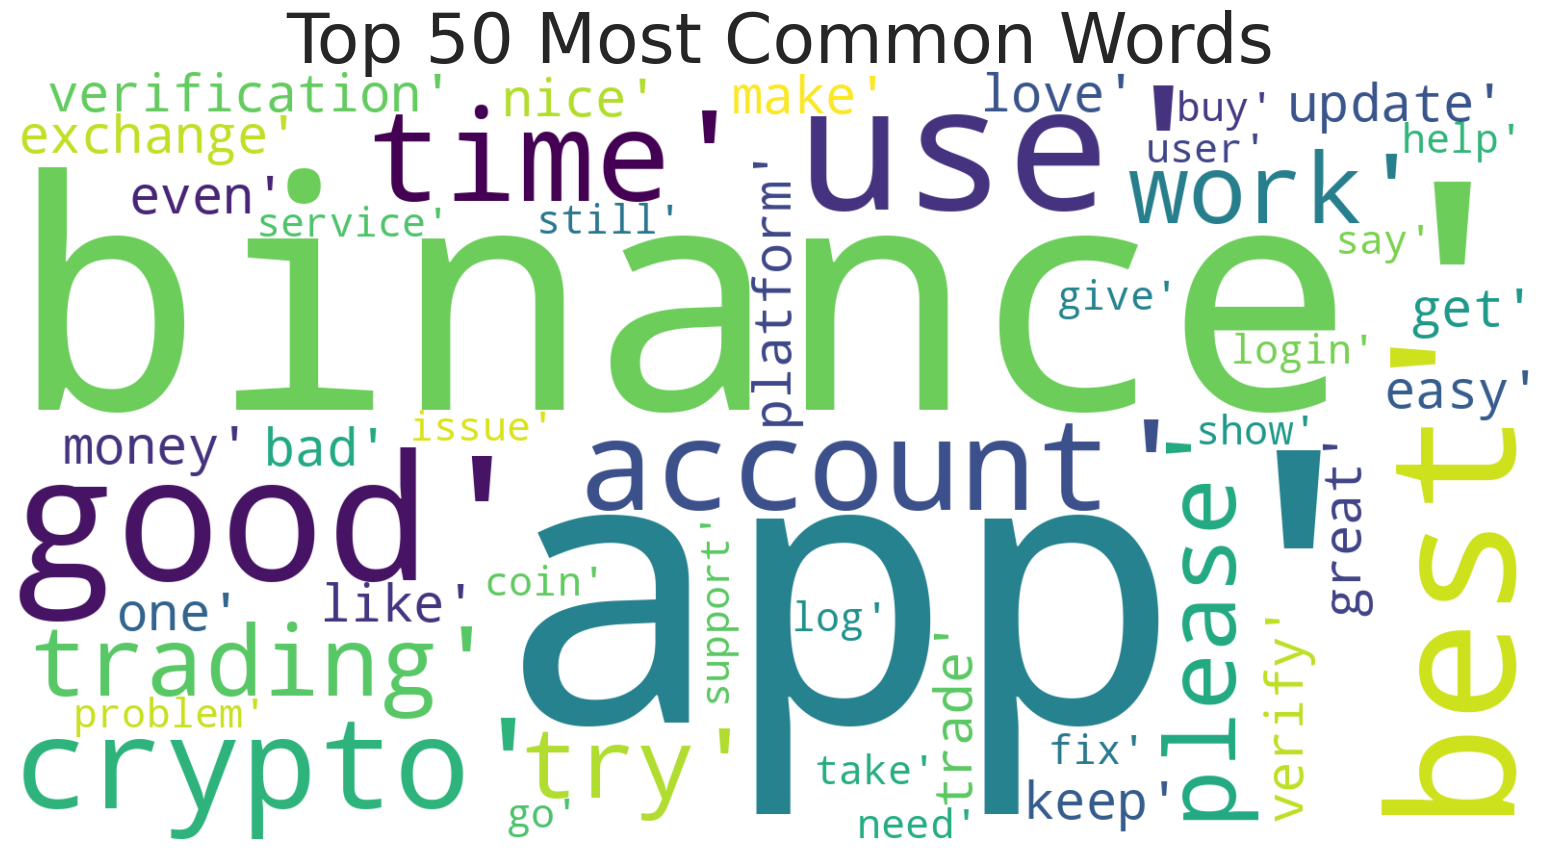

In [ ]:
# Create word cloud
mostcommon = FreqDist(content_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words', fontsize=50)
plt.show()

## Perbaikan Analisis POS Tag

In [ ]:
def extract_ngrams_pos(tokenized_data, n):
  ngrams_list = list(nltk.ngrams(tokenized_data, n))
  ngrams_pos_list = [[(gram, nltk.pos_tag([gram])[0][1]) for gram in ngram] for ngram in ngrams_list]
  return ngrams_pos_list

In [ ]:
data['content_ngrams'] = data['content_tokenized'].apply(lambda x: extract_ngrams(x, 2))
data['content_ngrams_pos'] = data['content_tokenized'].apply(lambda x: extract_ngrams_pos(x, 2))

In [ ]:
data.head(10)

,content,content_cleaned_lemmatized,content_cleaned,content_tokenized,content_ngrams,content_ngrams_pos
0,It has been very stable in the last few volati...,stable last volatile year app wise exchange wi...,it has been very stable in the last few volati...,"[stable, last, volatile, year, app, wise, exch...","[stable last, last volatile, volatile year, ye...","[[(stable, JJ), (last, JJ)], [(last, JJ), (vol..."
1,This service is increasingly becoming a pain t...,service increasingly become pain deal last tim...,this service is increasingly becoming a pain t...,"[service, increasingly, become, pain, deal, la...","[service increasingly, increasingly become, be...","[[(service, NN), (increasingly, RB)], [(increa..."
2,love how it allows me to make investments. als...,love allows make investment also give free cry...,love how it allows me to make investments also...,"[love, allows, make, investment, also, give, f...","[love allows, allows make, make investment, in...","[[(love, NN), (allows, NNS)], [(allows, NNS), ..."
3,The New button in Perpetual is quite confusing...,new button perpetual quite confuse anyone fami...,the new button in perpetual is quite confusing...,"[new, button, perpetual, quite, confuse, anyon...","[new button, button perpetual, perpetual quite...","[[(new, JJ), (button, NN)], [(button, NN), (pe..."
4,App keeps logging out and never allows me do a...,app keep log never allow anything withdrawal v...,app keeps logging out and never allows me do a...,"[app, keep, log, never, allow, anything, withd...","[app keep, keep log, log never, never allow, a...","[[(app, NN), (keep, VB)], [(keep, VB), (log, N..."
5,When this app initially was released you can e...,app initially release easily buy coin even kno...,when this app initially was released you can e...,"[app, initially, release, easily, buy, coin, e...","[app initially, initially release, release eas...","[[(app, NN), (initially, RB)], [(initially, RB..."
6,The Binance app's recent interface issue is ca...,binance app 's recent interface issue cause qu...,the binance app 's recent interface issue is c...,"[binance, app, 's, recent, interface, issue, c...","[binance app, app 's, 's recent, recent interf...","[[(binance, NN), (app, NN)], [(app, NN), ('s, ..."
7,Pfft. This is the online exchange app that kee...,pfft online exchange app keep load connect rig...,pfft this is the online exchange app that keep...,"[pfft, online, exchange, app, keep, load, conn...","[pfft online, online exchange, exchange app, a...","[[(pfft, NN), (online, NN)], [(online, NN), (e..."
8,The app has been frustrating in terms of the i...,app frustrating term information loading time ...,the app has been frustrating in terms of the i...,"[app, frustrating, term, information, loading,...","[app frustrating, frustrating term, term infor...","[[(app, NN), (frustrating, VBG)], [(frustratin..."
9,"After the update, I always have this problem o...",update always problem server issue close trade...,after the update i always have this problem of...,"[update, always, problem, server, issue, close...","[update always, always problem, problem server...","[[(update, NN), (always, RB)], [(always, RB), ..."


In [ ]:
import numpy as np

In [ ]:
list_words =[]
for word in data["content_ngrams_pos"]:
  for x in word:
    for y in x:
      list_words.append(y)

In [ ]:
list_words = [x[0] for x in list_words if x[1] == "JJ"]

In [ ]:
ngrams_pos_tag = count_topwords(list_words)

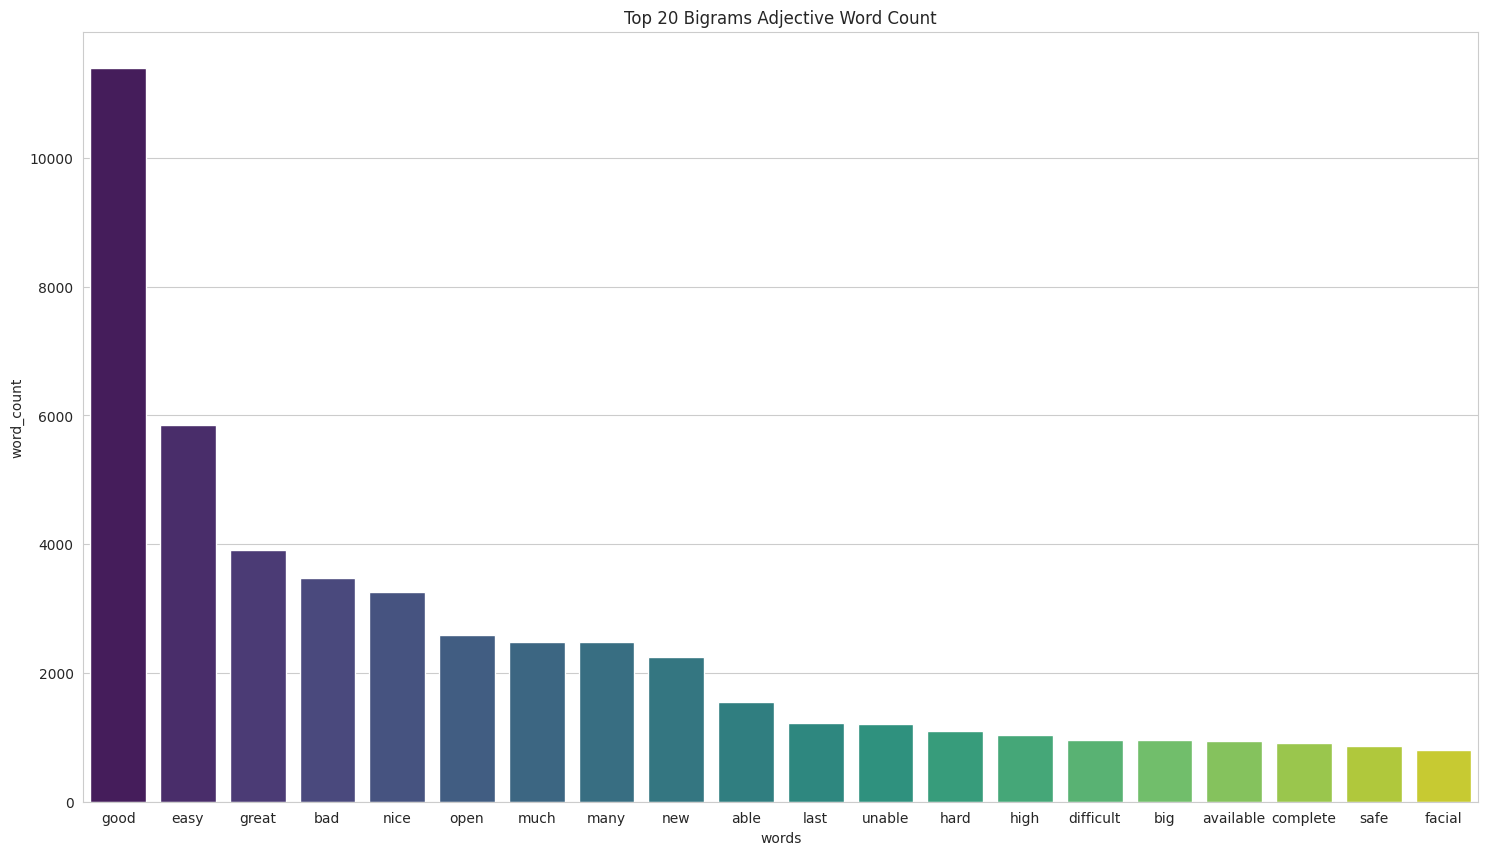

In [ ]:
tes = ngrams_pos_tag.nlargest(20, 'word_count')

# Barplot to show top 10 Bigrams Word Count
plt.figure(figsize=(18,10))
sns.barplot(data=tes, x='words', y='word_count', palette='viridis')
plt.xlabel('words')
plt.ylabel('word_count')
plt.title('Top 20 Bigrams Adjective Word Count')
plt.show()